## Exponential Smoothing Model


In this analysis, we explore the ETS (Error, Trend, Seasonal) framework for time series modeling, starting with a simple ETS configuration and progressively modifying key parameters such as ANN (Additive Level), AAN (Additive Level and Trend), MNN (Multiplicative Level), and AAN with a damped trend. Each model variation demonstrates its suitability for different types of time series data, capturing various patterns like level, trend, and proportional changes, while showcasing how damping helps produce conservative long-term forecasts. This comprehensive exploration highlights the flexibility and power of ETS models for time series analysis and forecasting

---

##### 1. Data Overview

The dataset comprises synthetic time series data with 100 observations representing hypothetical values over time. The goal was to model trends in the data and assess the ability of various ETS configurations to capture patterns and produce accurate forecasts.

##### 2. Forecasting Models 

- Simple Exponential Smoothing (SES):

    Models the level of the time series without accounting for trends or seasonality.
    Suitable for time series with no clear trend or seasonal patterns.

- ETS - ANN (Additive Level):

    Incorporates an additive level component without trend or seasonality.
    Captures consistent changes in the level over time but lacks flexibility for trends.

- ETS - AAN (Additive Level and Trend):

    Adds an additive trend component to the level.
    Useful for time series with linear growth or decline.

- ETS - MNN (Multiplicative Level):

    Uses a multiplicative level component.
    Best for data with proportional changes (e.g., exponential growth) but requires all values to be strictly positive.

- ETS - Damped AAN (Additive Level, Additive Trend, and Damping):

    Includes a damped trend to reduce the influence of trends over time.
    Suitable for time series with trends expected to stabilize or diminish in the future.

##### 3. Visualization
The analysis included visualizations of:

- Actual Data: Representing the historical time series for context.

- Fitted Values: Showing how each model approximates the observed data.

- Forecasts: Predicting future values, highlighting differences in model behavior.




### Package Load

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
import matplotlib.pyplot as plt

### Data Genertating

In [5]:
# Generate synthetic time series data
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=100, freq='D')
data = pd.Series(50 + np.random.normal(0, 5, 100).cumsum(), index=date_range)

### Model Fitting

#### Simple Exponential Smoothing Model

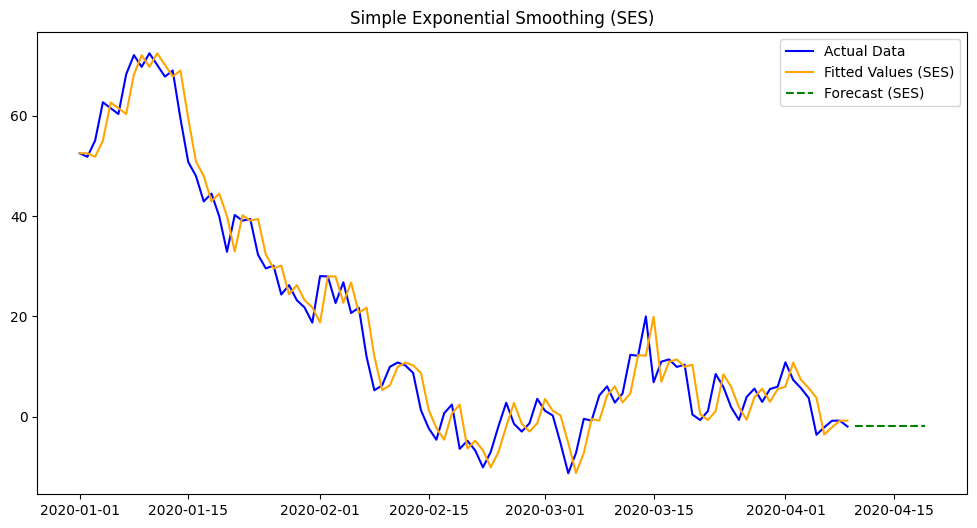

In [6]:

# Fit Simple Exponential Smoothing (SES) model
ses_model = SimpleExpSmoothing(data).fit()
ses_fitted = ses_model.fittedvalues
ses_forecast = ses_model.forecast(steps=10)

# Plot SES model results
plt.figure(figsize=(12, 6))
plt.plot(data, label="Actual Data", color='blue')
plt.plot(ses_fitted, label="Fitted Values (SES)", color='orange')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D'), ses_forecast, 
         label="Forecast (SES)", color='green', linestyle='--')
plt.title("Simple Exponential Smoothing (SES)")
plt.legend()
plt.show()

#### ETS - ANN Model

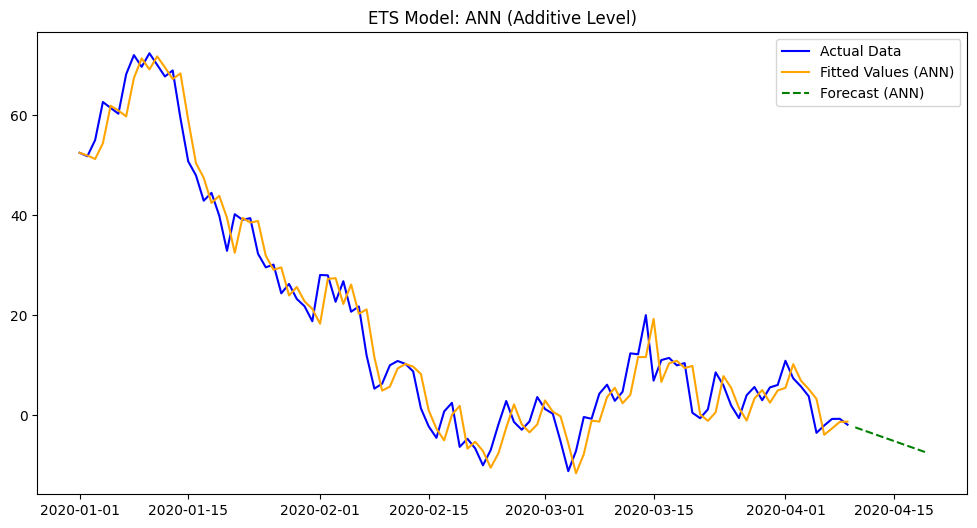

In [7]:
# Fit ETS - ANN Model
ann_model = ExponentialSmoothing(data, trend='add', seasonal=None, seasonal_periods=None).fit()
ann_fitted = ann_model.fittedvalues
ann_forecast = ann_model.forecast(steps=10)

# Plot ANN model results
plt.figure(figsize=(12, 6))
plt.plot(data, label="Actual Data", color='blue')
plt.plot(ann_fitted, label="Fitted Values (ANN)", color='orange')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D'), ann_forecast, 
         label="Forecast (ANN)", color='green', linestyle='--')
plt.title("ETS Model: ANN (Additive Level)")
plt.legend()
plt.show()

#### ETS - AAN

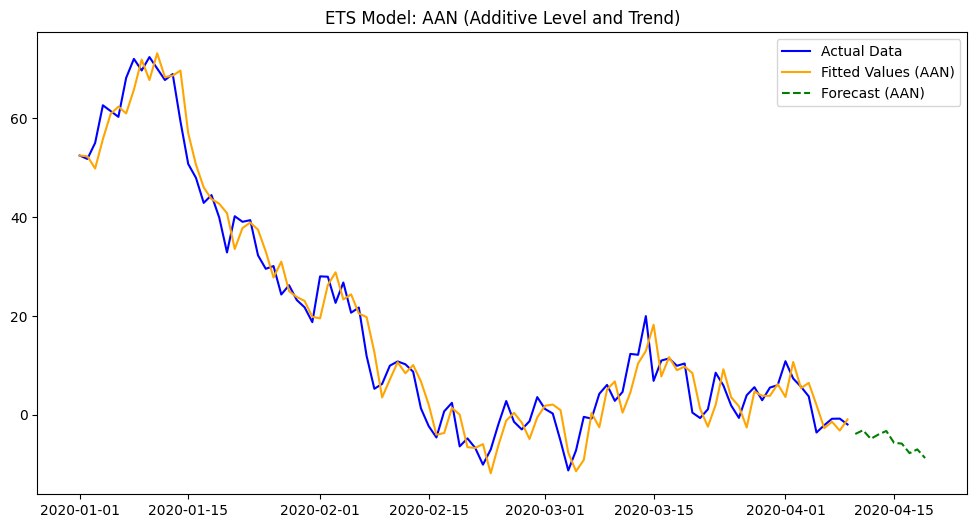

In [8]:
# Fit ETS - AAN Model
aan_model = ExponentialSmoothing(data, trend="add", seasonal='add', seasonal_periods=None).fit()
aan_fitted = aan_model.fittedvalues
aan_forecast = aan_model.forecast(steps=10)

# Plot AAN model results
plt.figure(figsize=(12, 6))
plt.plot(data, label="Actual Data", color='blue')
plt.plot(aan_fitted, label="Fitted Values (AAN)", color='orange')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D'), aan_forecast, 
         label="Forecast (AAN)", color='green', linestyle='--')
plt.title("ETS Model: AAN (Additive Level and Trend)")
plt.legend()
plt.show()

#### ETS - MNN

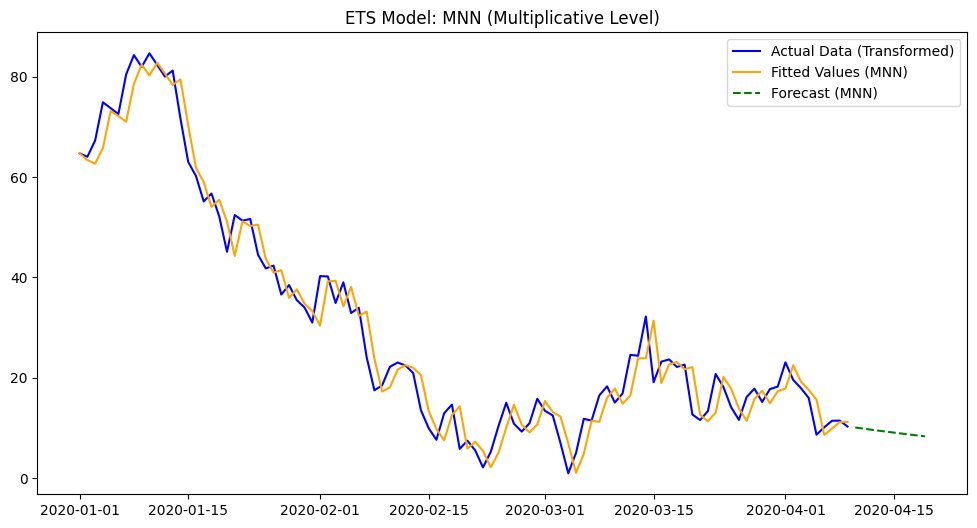

In [12]:
# Ensure data is strictly positive by adding a constant so we can apply 'mul'
positive_data = data - data.min() + 1  # Shifts all values to be > 0

# Fit ETS - MNN Model (Multiplicative Level)
mnn_model = ExponentialSmoothing(positive_data, trend="mul", seasonal=None, seasonal_periods=None).fit()
mnn_fitted = mnn_model.fittedvalues
mnn_forecast = mnn_model.forecast(steps=10)

# Plot MNN model results
plt.figure(figsize=(12, 6))
plt.plot(data.index, positive_data, label="Actual Data (Transformed)", color='blue')
plt.plot(data.index, mnn_fitted, label="Fitted Values (MNN)", color='orange')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D'), mnn_forecast, 
         label="Forecast (MNN)", color='green', linestyle='--')
plt.title("ETS Model: MNN (Multiplicative Level)")
plt.legend()
plt.show()



#### ETS - MMN

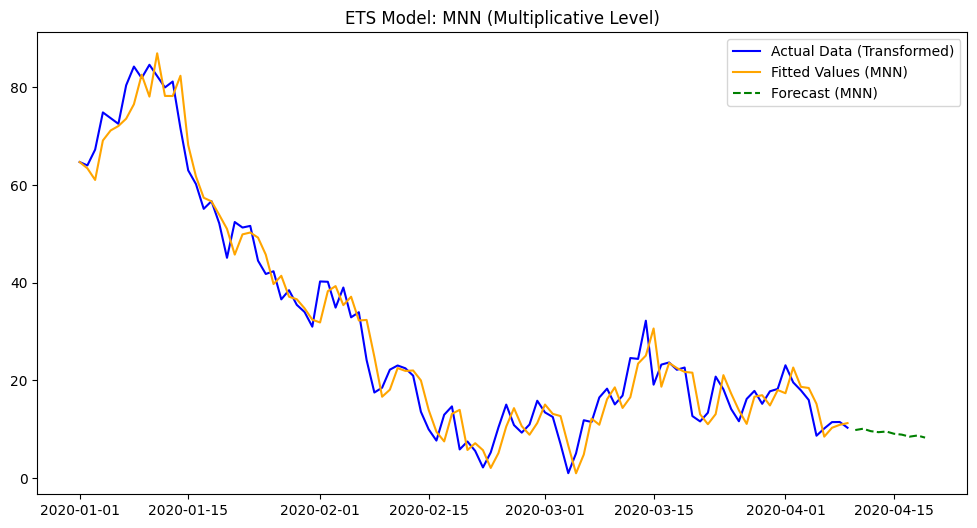

In [13]:
# Ensure data is strictly positive by adding a constant
positive_data = data - data.min() + 1  # Shifts all values to be > 0

# Fit ETS - MNN Model (Multiplicative Level)
mnn_model = ExponentialSmoothing(positive_data, trend="mul", seasonal='mul', seasonal_periods=None).fit()
mnn_fitted = mnn_model.fittedvalues
mnn_forecast = mnn_model.forecast(steps=10)

# Plot MNN model results
plt.figure(figsize=(12, 6))
plt.plot(data.index, positive_data, label="Actual Data (Transformed)", color='blue')
plt.plot(data.index, mnn_fitted, label="Fitted Values (MNN)", color='orange')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D'), mnn_forecast, 
         label="Forecast (MNN)", color='green', linestyle='--')
plt.title("ETS Model: MNN (Multiplicative Level)")
plt.legend()
plt.show()

### ETS - ANN Damped

In [ ]:
# Fit ETS - Damped AAN Model
damped_aan_model = ExponentialSmoothing(data, trend="add", damped_trend=True, seasonal=None, seasonal_periods=None).fit()
damped_aan_fitted = damped_aan_model.fittedvalues
damped_aan_forecast = damped_aan_model.forecast(steps=10)

# Plot Damped AAN model results
plt.figure(figsize=(12, 6))
plt.plot(data, label="Actual Data", color='blue')
plt.plot(damped_aan_fitted, label="Fitted Values (Damped AAN)", color='orange')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D'), damped_aan_forecast, 
         label="Forecast (Damped AAN)", color='green', linestyle='--')
plt.title("ETS Model: Damped AAN (Additive Level, Additive Trend, and Damped)")
plt.legend()
plt.show()